In [1]:
%cd ..
import os
import cv2 
import features
import generate_data
from pathlib import Path
import numpy as np
%cd ./notebooks

c:\Users\NataphopT\Desktop\ARVHackathon\varuna-hackathon
c:\Users\NataphopT\Desktop\ARVHackathon\varuna-hackathon\notebooks


In [2]:
SIZE = (2051,2051)
saved_folder = '../data/ndvi_ndmi_ndmi_savi/'
data_folders = '../raw_data/sentinel-2-image/'
years = ['2020', '2021']
days = {}

# list all days in 2020 and 2021 folders
for year in years:
    days[year] = os.listdir(data_folders + year)

In [3]:
# create folder to save processed data
for year in years:

    Path(os.path.join(saved_folder, year)).mkdir(parents=True, exist_ok=True)
    for day in days[year]:
        print(day)
        raw_spectrum = {}
        # combined all raw spectrals
        paths = generate_data.get_raw_data_paths(year, str(day))
        paths= {k: '../'+v for k,v in paths.items()}
        
        raw_spectrum = {}
        for band, path in paths.items():
            if band in ['b3','b4','b8','b11']:
                try:
                    raw_spectrum[band] = cv2.resize(cv2.imread(path, cv2.IMREAD_ANYDEPTH).astype(np.uint16), dsize=SIZE)
                except:
                    raw_spectrum[band] = np.zeros((SIZE[0], SIZE[1], 1))

        # add more features
        ndvi = features.ndvi(raw_spectrum)
        ndmi = features.ndmi(raw_spectrum)
        ndwi = features.ndwi(raw_spectrum)
        savi = features.savi(raw_spectrum)

        all = np.dstack((ndvi,
                        ndmi,
                        ndwi,
                        savi))
        
        np.save(saved_folder + f'{year}/{day}.npy', all)


20200102


c:\Users\NataphopT\Desktop\ARVHackathon\varuna-hackathon\features.py:7: RuntimeWarning: invalid value encountered in true_divide
  ndvi = (b8-b4)/(b8+b4+1e-8)
c:\Users\NataphopT\Desktop\ARVHackathon\varuna-hackathon\features.py:50: RuntimeWarning: invalid value encountered in true_divide
  ndmi = (b8-b11)/(b8+b11+1e-8)
c:\Users\NataphopT\Desktop\ARVHackathon\varuna-hackathon\features.py:92: RuntimeWarning: invalid value encountered in true_divide
  ndwi = (b3-b8)/(b3+b8+1e-8)


20200107
20200112
20200117
20200122
20200127
20200201
20200206
20200211
20200216
20200221
20200226
20200302
20200307
20200312
20200317
20200322
20200327
20200401
20200406
20200411
20200421
20200426
20200501
20200506
20200511
20200516
20200521
20200526
20200531
20200605
20200610
20200615
20200620
20200625
20200630
20200705
20200710
20200715
20200720
20200725
20200730
20200804
20200809
20200814
20200819
20200824
20200829
20200903
20200908
20200913
20200918
20200923
20200928
20201003
20201008
20201013
20201018
20201023
20201028
20201102
20201107
20201112
20201117
20201122
20201127
20201202
20201207
20201212
20201217
20201227
20210101
20210106
20210111
20210116
20210121
20210126
20210205
20210210
20210215
20210220
20210225
20210302
20210307
20210312
20210317
20210322
20210327
20210401
20210406
20210411
20210416
20210421
20210426
20210501
20210506
20210511
20210516
20210521
20210526
20210531
20210605
20210610
20210615
20210620
20210625
20210630
20210705
20210710
20210715
20210720
20210725
2

In [4]:
def poly_crop_dict(mask_dir):
    poly_crop_dict = {}
    for crop_type in ['1','2','3','4']:
        crop_dir = os.path.join(mask_dir, crop_type)
        all_poly = os.listdir(crop_dir)
        poly_list = [poly.replace('.npy', '') for poly in all_poly]
        
        poly_crop_dict[crop_type] = poly_list

    return poly_crop_dict

mask_dir = '../data/mask/'
poly_crop_dictionary = poly_crop_dict(mask_dir)

In [5]:
def yearly_index(year, data_folder, index):
    files = os.listdir(data_folder + year)
    files.sort()
    yearly_index = np.zeros((SIZE[0], SIZE[1], 0))

    if (index == 'ndvi'): index_num = 0
    if (index == 'ndmi'): index_num = 1
    if (index == 'ndwi'): index_num = 2
    if (index == 'savi'): index_num = 3

    for file in files:
        print(file)
        new_data = np.load(os.path.join(data_folder, year, file))

        index = np.expand_dims(new_data[:,:,index_num], axis = 2)
        yearly_index = np.concatenate((yearly_index, index), axis=2)

    return yearly_index

In [6]:
data_folder = '../data/ndvi_ndmi_ndmi_savi/'

ndvi_2020 = yearly_index('2020', data_folder, 'ndvi')
ndvi_2021 = yearly_index('2021', data_folder, 'ndvi')

ndmi_2020 = yearly_index('2020', data_folder, 'ndmi')
ndmi_2021 = yearly_index('2021', data_folder, 'ndmi')

ndwi_2020 = yearly_index('2020', data_folder, 'ndwi')
ndwi_2021 = yearly_index('2021', data_folder, 'ndwi')

savi_2020 = yearly_index('2020', data_folder, 'savi')
savi_2021 = yearly_index('2021', data_folder, 'savi')

20200102.npy
20200107.npy
20200112.npy
20200117.npy
20200122.npy
20200127.npy
20200201.npy
20200206.npy
20200211.npy
20200216.npy
20200221.npy
20200226.npy
20200302.npy
20200307.npy
20200312.npy
20200317.npy
20200322.npy
20200327.npy
20200401.npy
20200406.npy
20200411.npy
20200421.npy
20200426.npy
20200501.npy
20200506.npy
20200511.npy
20200516.npy
20200521.npy
20200526.npy
20200531.npy
20200605.npy
20200610.npy
20200615.npy
20200620.npy
20200625.npy
20200630.npy
20200705.npy
20200710.npy
20200715.npy
20200720.npy
20200725.npy
20200730.npy
20200804.npy
20200809.npy
20200814.npy
20200819.npy
20200824.npy
20200829.npy
20200903.npy
20200908.npy
20200913.npy
20200918.npy
20200923.npy
20200928.npy
20201003.npy
20201008.npy
20201013.npy
20201018.npy
20201023.npy
20201028.npy
20201102.npy
20201107.npy
20201112.npy
20201117.npy
20201122.npy
20201127.npy
20201202.npy
20201207.npy
20201212.npy
20201217.npy
20201227.npy
20210101.npy
20210106.npy
20210111.npy
20210116.npy
20210121.npy
20210126.npy

In [7]:
import random

def poly_avg_index(index, mask_dir):

    # get average index over a year in each polygon
    mask_dir = mask_dir
    avg_index = {}
    for crop_type in ['1','2','3','4']:
        crop_dir = os.path.join(mask_dir, crop_type)
        selected_poly = random.sample(os.listdir(crop_dir), 10)

        for poly in selected_poly:
            print(poly)
            ploy_dir = os.path.join(crop_dir, poly)
            poly_num = poly.replace('.npy','')
            poly_mask = np.expand_dims(np.load(ploy_dir).astype(int), axis = 2)
            
            poly_mask = np.broadcast_to(poly_mask, (index.shape))
            poly_index = np.multiply(index, poly_mask)
            
            poly_index[poly_index == 0] = np.nan
            avg_index[poly_num] = np.nanmean(poly_index, axis=(0,1))
    
    return avg_index

In [8]:
avg_ndvi_2020 = poly_avg_index(ndvi_2020, mask_dir)
avg_ndvi_2021 = poly_avg_index(ndvi_2021, mask_dir)

avg_ndmi_2020 = poly_avg_index(ndmi_2020, mask_dir)
avg_ndmi_2021 = poly_avg_index(ndmi_2021, mask_dir)

avg_ndwi_2020 = poly_avg_index(ndwi_2020, mask_dir)
avg_ndwi_2021 = poly_avg_index(ndwi_2021, mask_dir)

avg_savi_2020 = poly_avg_index(savi_2020, mask_dir)
avg_savi_2021 = poly_avg_index(savi_2021, mask_dir)

1258.npy
1053.npy
195.npy
976.npy
840.npy
444.npy
1001.npy
1094.npy
785.npy
985.npy
1025.npy
1229.npy
247.npy
767.npy
12.npy
596.npy
205.npy
565.npy
1024.npy
1225.npy
825.npy
1075.npy
1096.npy
1300.npy
660.npy
255.npy
311.npy
86.npy
943.npy
336.npy
185.npy
965.npy
380.npy
433.npy
51.npy
951.npy
1241.npy
152.npy
1302.npy
610.npy
9.npy
558.npy
669.npy
882.npy
667.npy
57.npy
342.npy
1103.npy
713.npy
670.npy
881.npy
106.npy
143.npy
1294.npy
186.npy
868.npy
430.npy
1308.npy
1022.npy
109.npy
477.npy
1256.npy
388.npy
111.npy
435.npy
556.npy
3.npy
1036.npy
661.npy
491.npy
1047.npy
852.npy
308.npy
623.npy
279.npy
259.npy
1162.npy
433.npy
687.npy
951.npy
393.npy
57.npy
147.npy
515.npy
667.npy
93.npy
1263.npy
301.npy
270.npy
668.npy
1192.npy
564.npy
54.npy
481.npy
183.npy
998.npy
639.npy
346.npy
21.npy
586.npy
677.npy
1305.npy
217.npy
812.npy
196.npy
1145.npy
1089.npy
676.npy
441.npy
234.npy
392.npy
1287.npy
1298.npy
182.npy
718.npy
1098.npy
548.npy
1039.npy
581.npy
394.npy
732.npy
527.npy
415.np

In [14]:
import matplotlib.pyplot as plt

def index_plot(index, conditon_multipier, index_name):
    plt.figure(1, figsize=(20, 10))
    for poly_num in index.keys():

        for crop_type in ['1','2','3','4']:
            plot_num = int('41'+crop_type)
            x = np.arange(71)

            if poly_num in poly_crop_dictionary[crop_type]:
                x = index[poly_num]
                x[np.where((x>(1*conditon_multipier))|(x<(-1*conditon_multipier)))] = 0
                plt.subplot(plot_num)
                plt.subplot(plot_num).title.set_text('label'+crop_type)
                plt.subplot(plot_num).set_ylabel(index_name)
                plt.plot(x)
    plt.savefig('../data/figures/'+index_name+'.png')
    plt.show()


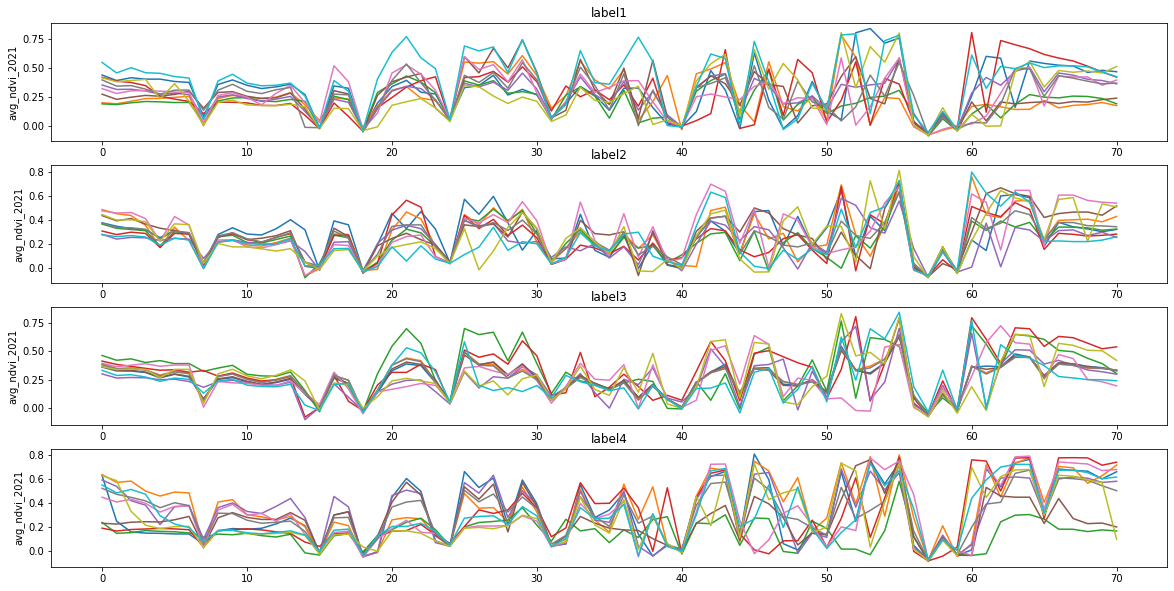

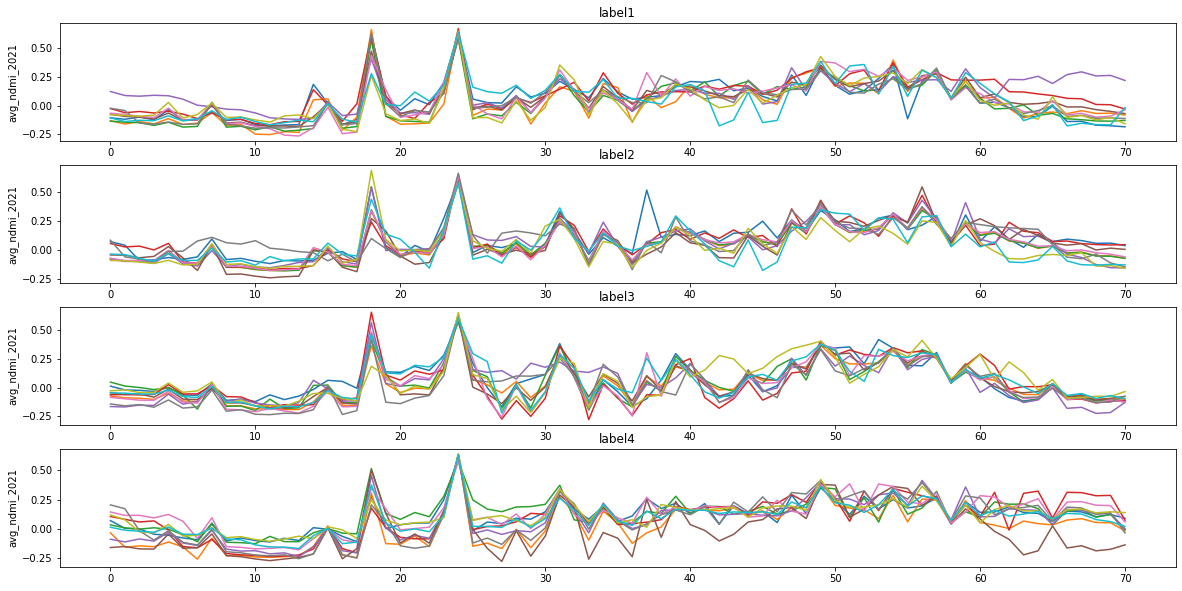

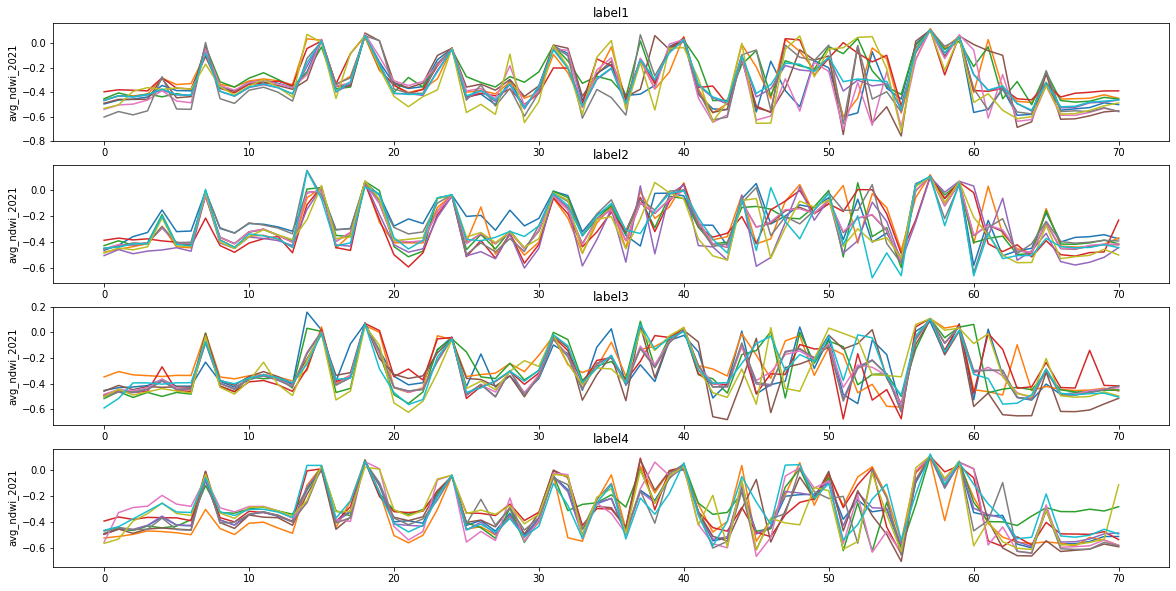

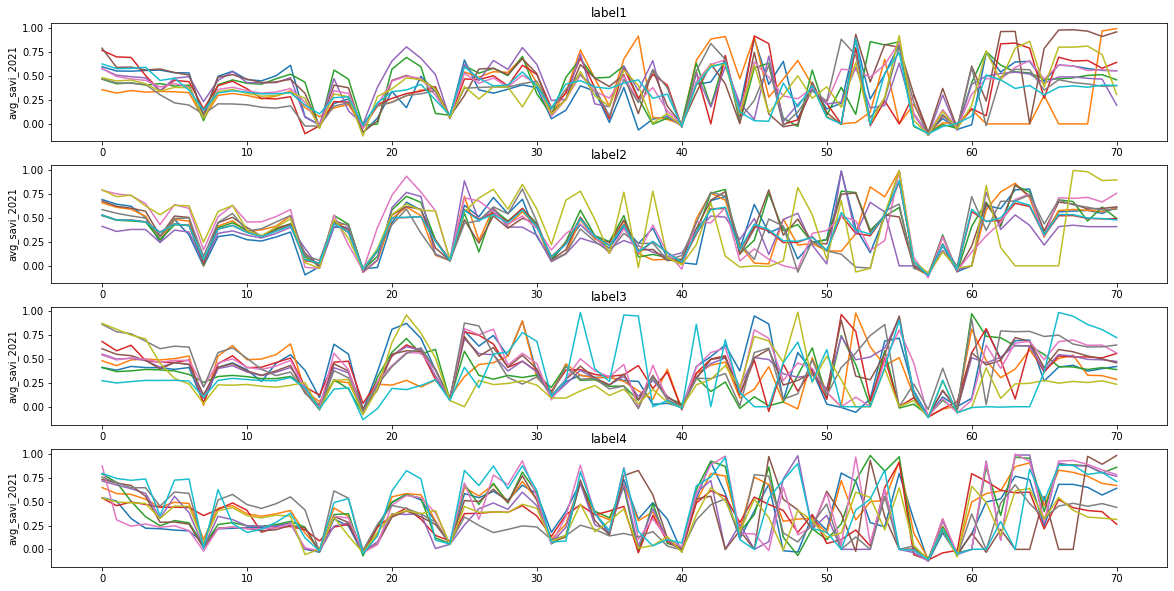

In [15]:
# filter out outliters outside its proper ranges
index_plot(avg_ndvi_2021, 1, 'avg_ndvi_2021')
index_plot(avg_ndmi_2021, 1, 'avg_ndmi_2021')
index_plot(avg_ndwi_2021, 1, 'avg_ndwi_2021')
index_plot(avg_savi_2021, 1, 'avg_savi_2021')